## Transmitter Classifition
Using synthetic signals data, predict the transmitter name using Random Forest

Author: Carlos Caballero / Data Scientist

### Create synthetic data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy import stats
from scipy.stats import mstats
from scipy.stats import skew
from scipy.stats import kurtosis
import datetime
from datetime import timedelta
import random
%matplotlib inline 

In [40]:
# Create RF data
def freq(start, end, size):
    num = []
    for i in range(size):
        num.append((random.randint(start,end)))
    return num

In [41]:
# Create PRI data
def pri(start, end, size):
    num = []
    for i in range(size):
        num.append((random.randint(start,end))/1)
    return num

In [42]:
# Create PW data
def pw(start, end, size):
    num = []
    for i in range(size):
        num.append((random.randint(start,end))/1)
    return num

In [43]:
# Create PRI_TYPE data
def pri_type(start, end, size):
    num = []
    for i in range(size):
        num.append((random.randint(start,end)))
    return num

In [44]:
# Create Duty Cycle Data
def duty_cycle(start, end, size):
    num = []
    for i in range(size):
        num.append(int(random.randint(start,end))/100)
    return num

In [45]:
def pulse_rep_freq(start, end, size):
    num = []
    for i in range(size):
        num.append(int(random.randint(start,end))/1000)
    return num

In [8]:
# Create random numbers and sort values
n = 43200 #number of seconds in half a day, which represents real test flight
#idx = pd.date_range('2019-04-16 06:00:00', periods=n, freq='S')
#ts = pd.Series(range(n), index=idx)
ts = pd.date_range('2019-04-16 06:00:00', periods=n, freq='S')

rf_freq = freq(2000, 12000, n)
pri = pri(200, 800, n)
pw = pw(1, 9, n)
pri_t = pri_type(0, 8, n)
dc = duty_cycle(0, 100, n)

data = pd.DataFrame(ts, columns = ['TIME'])
data['RF'] = np.sort(rf_freq)
data['PRI'] = np.sort(pri)
data['PW'] = np.sort(pw)
data['PRI_TYPE'] = np.array(pri_t)
data['DUTY_CYCLE'] = np.sort(dc)

In [9]:
data.sort_index(inplace=True)
data.sort_values(by='TIME', axis = 0, inplace=True)

In [10]:
data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE
0,2019-04-16 06:00:00,2000,200.0,1.0,7,0.0
1,2019-04-16 06:00:01,2000,200.0,1.0,6,0.0
2,2019-04-16 06:00:02,2001,200.0,1.0,4,0.0
3,2019-04-16 06:00:03,2001,200.0,1.0,4,0.0
4,2019-04-16 06:00:04,2001,200.0,1.0,1,0.0


In [11]:
data.shape

(43200, 6)

In [12]:
data['PULSE_REP_FREQ'] = 1/data['PRI']
data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
0,2019-04-16 06:00:00,2000,200.0,1.0,7,0.0,0.005
1,2019-04-16 06:00:01,2000,200.0,1.0,6,0.0,0.005
2,2019-04-16 06:00:02,2001,200.0,1.0,4,0.0,0.005
3,2019-04-16 06:00:03,2001,200.0,1.0,4,0.0,0.005
4,2019-04-16 06:00:04,2001,200.0,1.0,1,0.0,0.005


In [13]:
data.shape

(43200, 7)

In [14]:
# Index by dataframe length rather than time
data = data.set_index([pd.Index(range(len(data)))])
data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
0,2019-04-16 06:00:00,2000,200.0,1.0,7,0.0,0.005
1,2019-04-16 06:00:01,2000,200.0,1.0,6,0.0,0.005
2,2019-04-16 06:00:02,2001,200.0,1.0,4,0.0,0.005
3,2019-04-16 06:00:03,2001,200.0,1.0,4,0.0,0.005
4,2019-04-16 06:00:04,2001,200.0,1.0,1,0.0,0.005


In [15]:
# Assign transmitter/emitter names 
data['ELNOT'] = ""

data['ELNOT'].iloc[0:2000] = 'A221'
data['ELNOT'].iloc[2000:4000] = 'B222'
data['ELNOT'].iloc[4000:6000] = 'C321'
data['ELNOT'].iloc[6000:8000] = 'D456'
data['ELNOT'].iloc[8000:10000] = 'E521'
data['ELNOT'].iloc[10000:12000] = 'F876'
data['ELNOT'].iloc[12000:14000] = 'G645'
data['ELNOT'].iloc[14000:16000] = 'H874'
data['ELNOT'].iloc[16000:18000] = 'I345'
data['ELNOT'].iloc[18000:20000] = 'J234'
data['ELNOT'].iloc[20000:22000] = 'K543'
data['ELNOT'].iloc[22000:24000] = 'L743'
data['ELNOT'].iloc[24000:26000] = 'M365'
data['ELNOT'].iloc[26000:28000] = 'N873'
data['ELNOT'].iloc[28000:30000] = 'O253'
data['ELNOT'].iloc[30000:32000] = 'P546'
data['ELNOT'].iloc[32000:34000] = 'Q761'
data['ELNOT'].iloc[34000:36000] = 'R673'
data['ELNOT'].iloc[36000:38000] = 'S904'
data['ELNOT'].iloc[38000:40000] = 'T746'
data['ELNOT'].iloc[40000:43200] = 'Y567'

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
# Convert ELNOT feature to array
data['ELNOT'].values

array(['A221', 'A221', 'A221', ..., 'Y567', 'Y567', 'Y567'], dtype=object)

In [17]:
# Check last part of dataframe for correctness
data.iloc[38000:].head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ,ELNOT
38000,2019-04-16 16:33:20,10778,729.0,8.0,0,0.88,0.001372,T746
38001,2019-04-16 16:33:21,10778,729.0,8.0,0,0.88,0.001372,T746
38002,2019-04-16 16:33:22,10778,729.0,8.0,4,0.88,0.001372,T746
38003,2019-04-16 16:33:23,10778,729.0,8.0,3,0.88,0.001372,T746
38004,2019-04-16 16:33:24,10778,729.0,8.0,8,0.88,0.001372,T746


In [18]:
# Assign signal track IDs
data['TRACK_ID'] = ""

data['TRACK_ID'].iloc[0:2000] = '1-1'
data['TRACK_ID'].iloc[2000:4000] = '1-2'
data['TRACK_ID'].iloc[4000:6000] = '1-3'
data['TRACK_ID'].iloc[6000:8000] = '1-4'
data['TRACK_ID'].iloc[8000:10000] = '1-5'
data['TRACK_ID'].iloc[10000:12000] = '1-6'
data['TRACK_ID'].iloc[12000:14000] = '1-7'
data['TRACK_ID'].iloc[14000:16000] = '1-8'
data['TRACK_ID'].iloc[16000:18000] = '1-9'
data['TRACK_ID'].iloc[18000:20000] = '2-1'
data['TRACK_ID'].iloc[20000:22000] = '2-2'
data['TRACK_ID'].iloc[22000:24000] = '2-3'
data['TRACK_ID'].iloc[24000:26000] = '2-4'
data['TRACK_ID'].iloc[26000:28000] = '2-5'
data['TRACK_ID'].iloc[28000:30000] = '2-6'
data['TRACK_ID'].iloc[30000:32000] = '2-7'
data['TRACK_ID'].iloc[32000:34000] = '2-8'
data['TRACK_ID'].iloc[34000:36000] = '2-9'
data['TRACK_ID'].iloc[36000:38000] = '3-1'
data['TRACK_ID'].iloc[38000:40000] = '3-1'
data['TRACK_ID'].iloc[40000:43200] = '3-2'

In [19]:
data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ,ELNOT,TRACK_ID
0,2019-04-16 06:00:00,2000,200.0,1.0,7,0.0,0.005,A221,1-1
1,2019-04-16 06:00:01,2000,200.0,1.0,6,0.0,0.005,A221,1-1
2,2019-04-16 06:00:02,2001,200.0,1.0,4,0.0,0.005,A221,1-1
3,2019-04-16 06:00:03,2001,200.0,1.0,4,0.0,0.005,A221,1-1
4,2019-04-16 06:00:04,2001,200.0,1.0,1,0.0,0.005,A221,1-1


In [20]:
data.dtypes

TIME              datetime64[ns]
RF                         int64
PRI                      float64
PW                       float64
PRI_TYPE                   int64
DUTY_CYCLE               float64
PULSE_REP_FREQ           float64
ELNOT                     object
TRACK_ID                  object
dtype: object

### Explore the data

In [21]:
data.describe()

,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,7006.658843,500.068495,4.996597,3.977917,0.499437,0.002312
std,2886.029092,173.561816,2.579815,2.573663,0.291385,0.000959
min,2000.000000,200.000000,1.000000,0.000000,0.000000,0.001250
25%,4482.750000,350.000000,3.000000,2.000000,0.250000,0.001541
50%,7032.000000,500.000000,5.000000,4.000000,0.500000,0.002000
75%,9508.000000,649.000000,7.000000,6.000000,0.750000,0.002857
max,12000.000000,800.000000,9.000000,8.000000,1.000000,0.005000


In [22]:
# I would also like to know variance, median, skeness, and kurtosis for variables of interest
# Create a function that will give me everything

class Stats:
    def __init__(self, feature):
        self.minimum = np.min(feature)
        self.maximum = np.max(feature)
        self.mean = np.mean(feature)
        self.median = np.median(feature)
        self.variance = np.var(feature)
        self.std = np.std(feature)
        self.skew = skew(feature)
        self.kurtosis = kurtosis(feature)
        self.histogram = plt.hist(feature, color = 'green', alpha = 0.5)
        plt.title('Histogram')
        plt.ylabel('Frequency')
        plt.xlabel('Values')
        plt.show()
        self.plot = plt.plot(feature,data['ELNOT'], color = 'blue', alpha = 0.5)
        plt.title('Plot')
        plt.ylabel('ELNOT')
        plt.xlabel('Values')
        plt.show()
        
                        
    def desc_stats(self):
        print("Min: {:0.2f}".format(self.minimum))
        print("Max: {:0.2f}".format(self.maximum))
        print("Mean: {:0.2f}".format(self.mean))
        print("Median: {:0.2f}".format(self.median))
        print("Variance: {:0.2f}".format(self.variance))
        print("Standard Deviation: {:0.2f}".format(self.std))
        print("Skewness: {:0.2f}".format(self.skew))
        print("Kurtosis: {:0.2f}".format(self.kurtosis))
        print(self.histogram)
        print(self.plot)

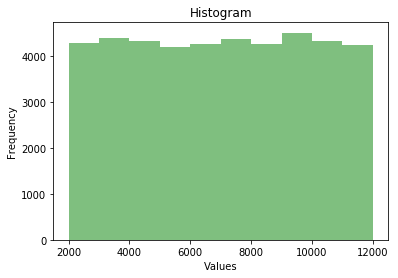

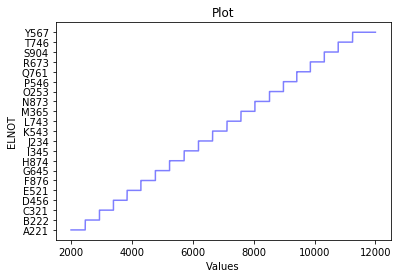

Min: 2000.00
Max: 12000.00
Mean: 7006.66
Median: 7032.00
Variance: 8328971.11
Standard Deviation: 2886.00
Skewness: -0.01
Kurtosis: -1.21
(array([4285., 4388., 4322., 4195., 4272., 4366., 4268., 4513., 4338.,
       4253.]), array([ 2000.,  3000.,  4000.,  5000.,  6000.,  7000.,  8000.,  9000.,
       10000., 11000., 12000.]), <a list of 10 Patch objects>)


In [23]:
RF = Stats(data['RF'])
RF.desc_stats()

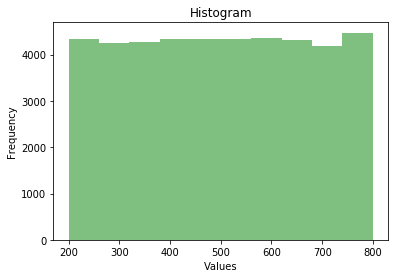

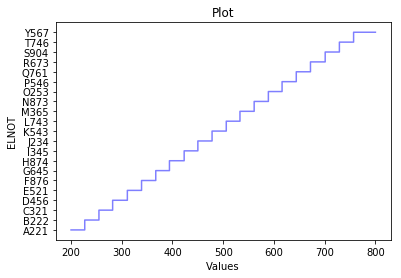

Min: 200.00
Max: 800.00
Mean: 500.07
Median: 500.00
Variance: 30123.01
Standard Deviation: 173.56
Skewness: -0.00
Kurtosis: -1.20
(array([4343., 4261., 4276., 4345., 4330., 4327., 4351., 4309., 4185.,
       4473.]), array([200., 260., 320., 380., 440., 500., 560., 620., 680., 740., 800.]), <a list of 10 Patch objects>)


In [24]:
PRI = Stats(data['PRI'])
PRI.desc_stats()

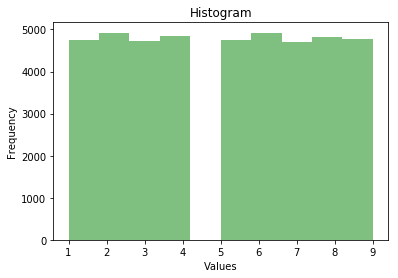

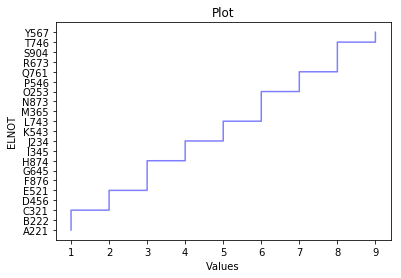

Min: 1.00
Max: 9.00
Mean: 5.00
Median: 5.00
Variance: 6.66
Standard Deviation: 2.58
Skewness: 0.00
Kurtosis: -1.23
(array([4747., 4916., 4730., 4844.,    0., 4744., 4923., 4694., 4826.,
       4776.]), array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]), <a list of 10 Patch objects>)


In [25]:
PW = Stats(data['PW'])
PW.desc_stats()

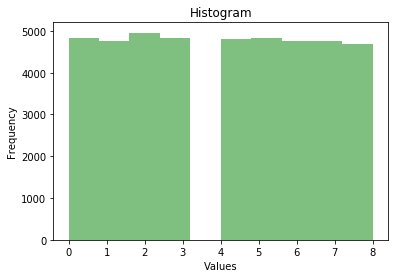

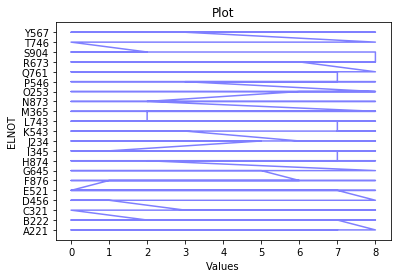

Min: 0.00
Max: 8.00
Mean: 3.98
Median: 4.00
Variance: 6.62
Standard Deviation: 2.57
Skewness: 0.01
Kurtosis: -1.22
(array([4823., 4755., 4956., 4829.,    0., 4807., 4827., 4767., 4761.,
       4675.]), array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]), <a list of 10 Patch objects>)


In [26]:
PRI_TYPE = Stats(data['PRI_TYPE'])
PRI_TYPE.desc_stats()

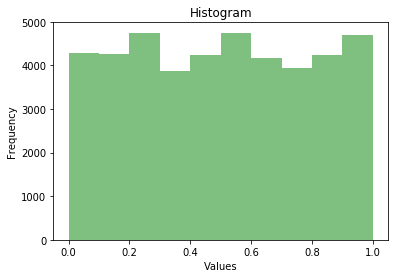

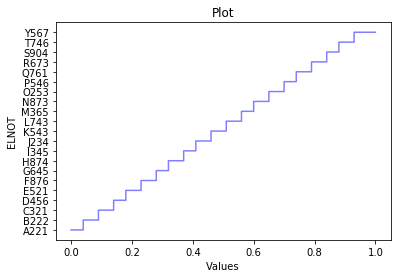

Min: 0.00
Max: 1.00
Mean: 0.50
Median: 0.50
Variance: 0.08
Standard Deviation: 0.29
Skewness: 0.00
Kurtosis: -1.20
(array([4289., 4266., 4740., 3881., 4237., 4751., 4172., 3931., 4241.,
       4692.]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [27]:
DUTY_CYCLE = Stats(data['DUTY_CYCLE'])
DUTY_CYCLE.desc_stats()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


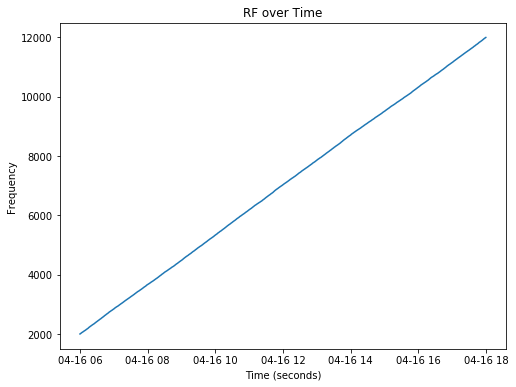

In [28]:
# Check Radio Frequency over time
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(data['TIME'], data['RF'])
plt.title('RF over Time')
plt.ylabel('Frequency')
plt.xlabel('Time (seconds)')
plt.show()

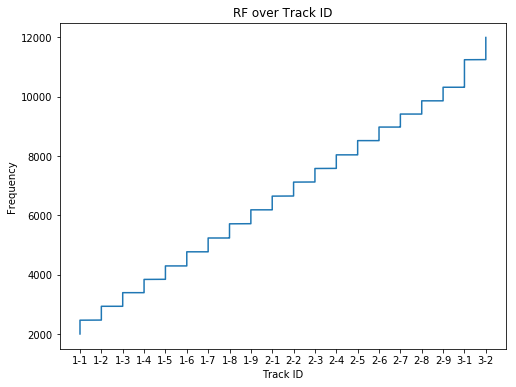

In [29]:
# Check Radio Frequency distribution by track ID
plt.rcParams["figure.figsize"] = (8,6)
plt.plot(data['TRACK_ID'], data['RF'])
plt.title('RF over Track ID')
plt.ylabel('Frequency')
plt.xlabel('Track ID')
plt.show()

## Pre-Process data and fit the data

#### Train model with 100% flight data from 4/16 and will test model with a new flight

In [30]:
feature_names = data.columns
feature = data[['RF', 'PRI', 'PW', 'PRI_TYPE', 'DUTY_CYCLE', 'PULSE_REP_FREQ']]
X_train = feature.values
y_train = data['ELNOT']

In [31]:
print(X_train.shape, y_train.shape)

(43200, 6) (43200,)


In [32]:
feature.head()

,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
0,2000,200.0,1.0,7,0.0,0.005
1,2000,200.0,1.0,6,0.0,0.005
2,2001,200.0,1.0,4,0.0,0.005
3,2001,200.0,1.0,4,0.0,0.005
4,2001,200.0,1.0,1,0.0,0.005


In [33]:
y_train.head()

0    A221
1    A221
2    A221
3    A221
4    A221
Name: ELNOT, dtype: object

In [34]:
# Normalize data
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_train[0:5]

array([[-1.73481162, -1.72890545, -1.54919794,  1.17424801, -1.71402807,
         2.80334863],
       [-1.73481162, -1.72890545, -1.54919794,  0.78569221, -1.71402807,
         2.80334863],
       [-1.73446511, -1.72890545, -1.54919794,  0.00858061, -1.71402807,
         2.80334863],
       [-1.73446511, -1.72890545, -1.54919794,  0.00858061, -1.71402807,
         2.80334863],
       [-1.73446511, -1.72890545, -1.54919794, -1.1570868 , -1.71402807,
         2.80334863]])

In [35]:
y_train[0:5]

0    A221
1    A221
2    A221
3    A221
4    A221
Name: ELNOT, dtype: object

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs = -1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [37]:
# Check feature importance
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = feature.columns,
                                    columns=['importance']).sort_values('importance', ascending = False)

In [38]:
print(feature_importances)

                importance
RF                0.384785
PULSE_REP_FREQ    0.233908
PRI               0.233880
DUTY_CYCLE        0.108675
PW                0.038752
PRI_TYPE          0.000000


In the future I can remove 'PW' and 'PRI_TYPE' due to not adding any value to the model

### Create synthetic test set 
The goal here is to simulate a new flight with new flight data to test/evaluate model

In [46]:
# Create test set with random numbers and sort values
# Date: 6/11/19
test_n = 7200 #number of seconds in 2 hours, which represents real test flight
#idx = pd.date_range('2019-04-16 06:00:00', periods=n, freq='S')
#ts = pd.Series(range(n), index=idx)
test_ts = pd.date_range('2019-06-11 13:00:00', periods=test_n, freq='S')

test_rf_freq = freq(8000, 11000, test_n)
test_pri = pri(600, 800, test_n)
test_pw = pw(1, 9, test_n)
test_pri_t = pri_type(0, 8, test_n)
test_dc = duty_cycle(0, 100, test_n)

test_data = pd.DataFrame(test_ts, columns = ['TIME'])
test_data['RF'] = np.sort(test_rf_freq)
test_data['PRI'] = np.sort(test_pri)
test_data['PW'] = np.sort(test_pw)
test_data['PRI_TYPE'] = np.array(test_pri_t)
test_data['DUTY_CYCLE'] = np.sort(test_dc)

In [47]:
test_data.sort_index(inplace=True)
test_data.sort_values(by='TIME', axis = 0, inplace=True)

In [48]:
test_data['PULSE_REP_FREQ'] = 1/test_data['PRI']
test_data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
0,2019-06-11 13:00:00,8000,600.0,1.0,8,0.0,0.001667
1,2019-06-11 13:00:01,8000,600.0,1.0,8,0.0,0.001667
2,2019-06-11 13:00:02,8000,600.0,1.0,6,0.0,0.001667
3,2019-06-11 13:00:03,8000,600.0,1.0,6,0.0,0.001667
4,2019-06-11 13:00:04,8000,600.0,1.0,5,0.0,0.001667


In [49]:
# Assign emitter/transmitter names
test_data['ELNOT'] = ""
test_data['ELNOT'].iloc[0:1200] = 'N873'
test_data['ELNOT'].iloc[1200:2200] = 'O253'
test_data['ELNOT'].iloc[2200:3200] = 'P546'
test_data['ELNOT'].iloc[3200:4200] = 'Q761'
test_data['ELNOT'].iloc[4200:5200] = 'R673'
test_data['ELNOT'].iloc[5200:6200] = 'S904'
test_data['ELNOT'].iloc[6200:7200] = 'T746'

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
# Assign signal track IDs
test_data['TRACK_ID'] = ""

test_data['TRACK_ID'].iloc[0:1200] = '1-1'
test_data['TRACK_ID'].iloc[1200:2200] = '1-2'
test_data['TRACK_ID'].iloc[2200:3200] = '1-3'
test_data['TRACK_ID'].iloc[3200:4200] = '1-4'
test_data['TRACK_ID'].iloc[4200:5200] = '1-5'
test_data['TRACK_ID'].iloc[5200:6200] = '1-6'
test_data['TRACK_ID'].iloc[6200:7200] = '1-7'

In [51]:
test_data.head()

,TIME,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ,ELNOT,TRACK_ID
0,2019-06-11 13:00:00,8000,600.0,1.0,8,0.0,0.001667,N873,1-1
1,2019-06-11 13:00:01,8000,600.0,1.0,8,0.0,0.001667,N873,1-1
2,2019-06-11 13:00:02,8000,600.0,1.0,6,0.0,0.001667,N873,1-1
3,2019-06-11 13:00:03,8000,600.0,1.0,6,0.0,0.001667,N873,1-1
4,2019-06-11 13:00:04,8000,600.0,1.0,5,0.0,0.001667,N873,1-1


In [52]:
test_data.describe()

,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,9514.070278,700.299028,5.049306,3.912500,0.506114,0.001438
std,869.846028,57.660652,2.598992,2.553957,0.292110,0.000119
min,8000.000000,600.000000,1.000000,0.000000,0.000000,0.001250
25%,8761.750000,652.000000,3.000000,2.000000,0.250000,0.001333
50%,9522.000000,700.000000,5.000000,4.000000,0.510000,0.001429
75%,10267.250000,750.000000,7.000000,6.000000,0.760000,0.001534
max,11000.000000,800.000000,9.000000,8.000000,1.000000,0.001667


In [53]:
test_feature_names = test_data.columns
test_feature = test_data[['RF', 'PRI', 'PW', 'PRI_TYPE', 'DUTY_CYCLE', 'PULSE_REP_FREQ']]
X_test = test_feature.values
y_test = test_data['ELNOT']

In [54]:
print(X_test.shape, y_test.shape)

(7200, 6) (7200,)


In [55]:
test_feature.head()

,RF,PRI,PW,PRI_TYPE,DUTY_CYCLE,PULSE_REP_FREQ
0,8000,600.0,1.0,8,0.0,0.001667
1,8000,600.0,1.0,8,0.0,0.001667
2,8000,600.0,1.0,6,0.0,0.001667
3,8000,600.0,1.0,6,0.0,0.001667
4,8000,600.0,1.0,5,0.0,0.001667


In [56]:
y_test.head()

0    N873
1    N873
2    N873
3    N873
4    N873
Name: ELNOT, dtype: object

In [57]:
# Normalize data
from sklearn import preprocessing
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
X_test[0:5]

array([[-1.74073961, -1.73959173, -1.55813772,  1.60056907, -1.73273723,
         1.91785501],
       [-1.74073961, -1.73959173, -1.55813772,  1.60056907, -1.73273723,
         1.91785501],
       [-1.74073961, -1.73959173, -1.55813772,  0.81741601, -1.73273723,
         1.91785501],
       [-1.74073961, -1.73959173, -1.55813772,  0.81741601, -1.73273723,
         1.91785501],
       [-1.74073961, -1.73959173, -1.55813772,  0.42583948, -1.73273723,
         1.91785501]])

### Make predictions and evaluate model

In [58]:
predictions = model.predict(X_test)

In [59]:
# Import confusion matrix to evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [60]:
# Check accuracy of model
from sklearn import metrics
print("Training Accuracy: ","%.2f" % metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy: ","%.2f" % metrics.accuracy_score(y_test, predictions))

Training Accuracy:  1.00
Test Accuracy:  0.08


In [61]:
# Calculate Jaccard Index
from sklearn.metrics import jaccard_similarity_score
print("Jaccard coeficient: ","%.2f" %jaccard_similarity_score(y_test, predictions))

Jaccard coeficient:  0.08


In [62]:
# See F1 score
from sklearn.metrics import f1_score
print("Avg F1-score: %.2f" % f1_score(y_test, predictions, average='weighted'))

Avg F1-score: 0.12


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
